# Classifikasi Genre Musik Pada Dataset musik di Spotify menggunakan Logistic Regression, Decision tree dan Random Forest 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('spotify_songs.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
df.drop(columns=['track_id','track_name','track_artist','track_album_id','track_album_name',
                         'playlist_id','playlist_name','playlist_id','playlist_subgenre'],inplace=True)

In [6]:
df.columns = ['popularity','year','genre','danceability','energy','key','loudness','mode',
                      'speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration']

In [7]:
df.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,66,2019-06-14,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,2019-12-13,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,2019-07-05,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,2019-07-19,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,2019-03-05,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [8]:
df.isnull().sum().sum()

0

<Axes: title={'center': 'Genre'}, xlabel='genre'>

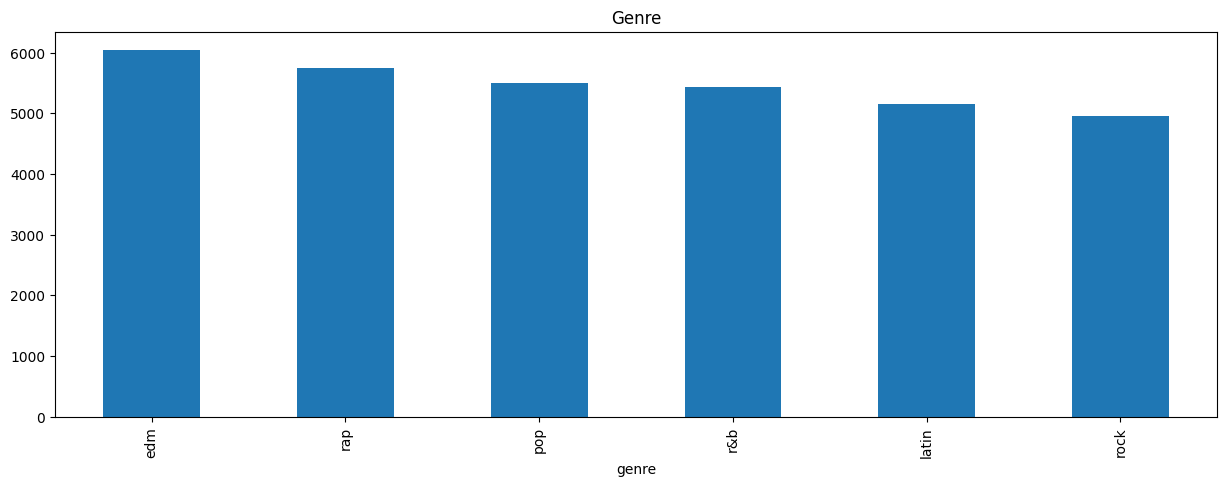

In [9]:
df['genre'].value_counts().plot(kind='bar',figsize=(15,5), title='Genre')

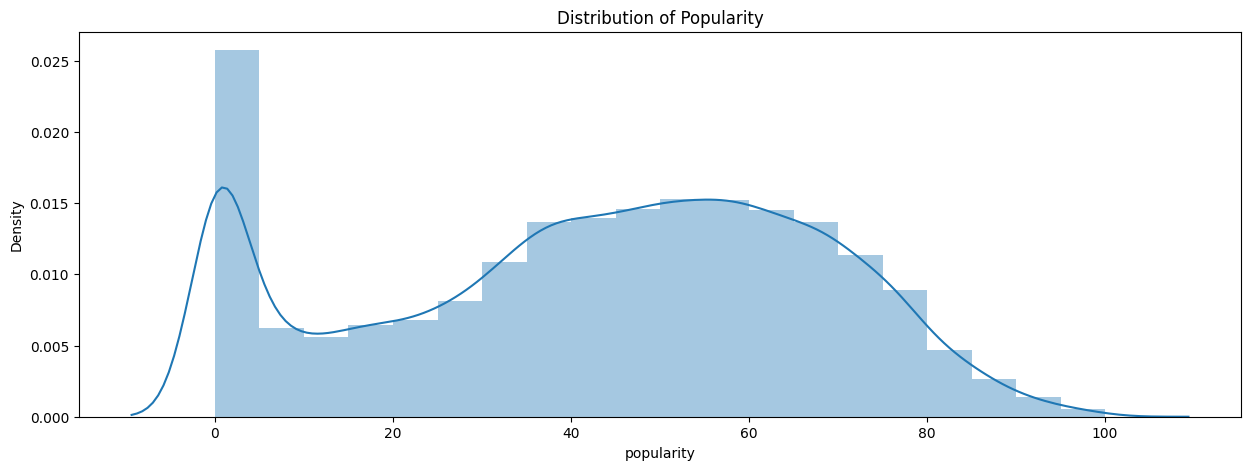

In [10]:
# distribution of popularity
plt.figure(figsize=(15,5))
sns.distplot(df['popularity'], bins=20)
plt.title('Distribution of Popularity')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        32833 non-null  int64  
 1   year              32833 non-null  object 
 2   genre             32833 non-null  object 
 3   danceability      32833 non-null  float64
 4   energy            32833 non-null  float64
 5   key               32833 non-null  int64  
 6   loudness          32833 non-null  float64
 7   mode              32833 non-null  int64  
 8   speechiness       32833 non-null  float64
 9   acousticness      32833 non-null  float64
 10  instrumentalness  32833 non-null  float64
 11  liveness          32833 non-null  float64
 12  valence           32833 non-null  float64
 13  tempo             32833 non-null  float64
 14  duration          32833 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 3.8+ MB


In [12]:
# melihat 

# Data Preprocessing

In [13]:
df.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,66,2019-06-14,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,2019-12-13,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,2019-07-05,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,2019-07-19,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,2019-03-05,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [14]:
df.drop(columns=['year'],inplace=True)

In [15]:
df.head()

,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,66,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [16]:
# scaling kolom genre menggunakan LabelEncoder
le = LabelEncoder()
df['genre'] = le.fit_transform(df['genre'])
df.head()

,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,66,2,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,2,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,2,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,2,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


<Axes: title={'center': 'Genre'}, xlabel='genre'>

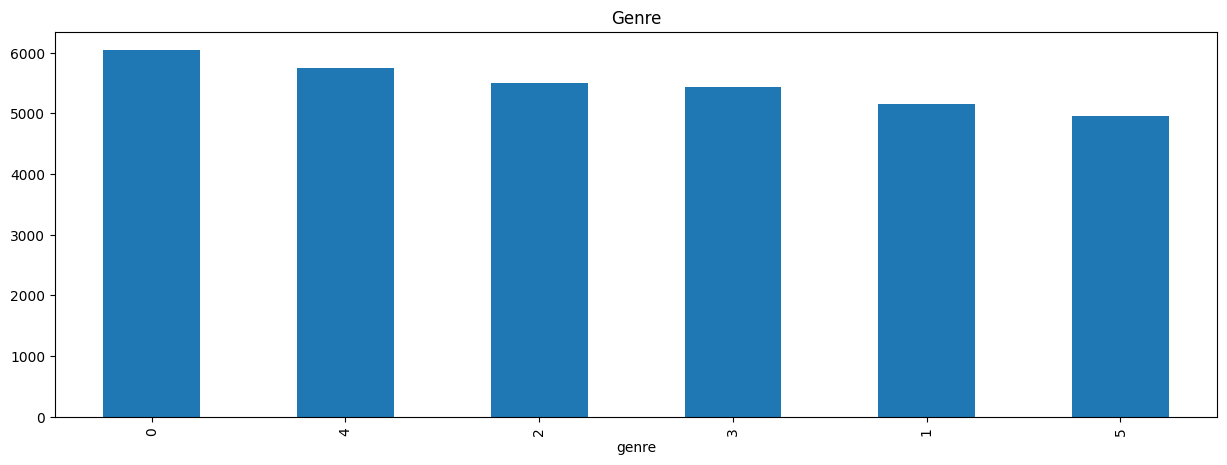

In [17]:
df['genre'].value_counts().plot(kind='bar',figsize=(15,5), title='Genre')

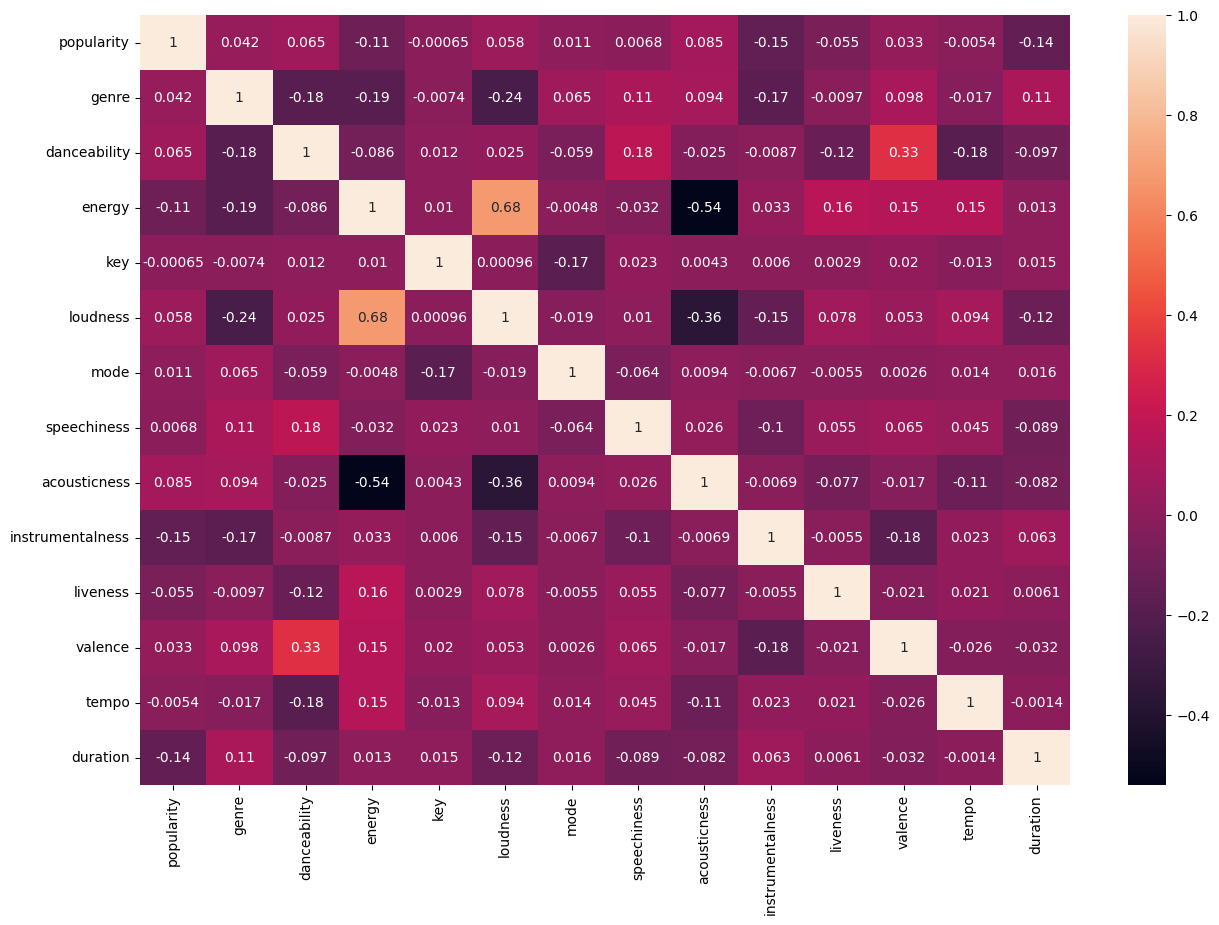

In [18]:
# melihat korelasi antar kolom
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [19]:
# normalisasi data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['popularity','danceability','energy','key','loudness','mode','speechiness','acousticness',
        'instrumentalness','liveness','valence','tempo','duration']] = scaler.fit_transform(df[['popularity','danceability','energy','key','loudness','mode','speechiness','acousticness',
        'instrumentalness','liveness','valence','tempo','duration']])
df.head()

,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0.66,2,0.760936,0.915985,0.545455,0.918090,1.0,0.063508,0.102616,0.000000,0.065562,0.522704,0.509673,0.371254
1,0.67,2,0.738555,0.814968,1.000000,0.869162,1.0,0.040632,0.072837,0.004235,0.358434,0.699294,0.417524,0.308674
2,0.70,2,0.686673,0.930988,0.090909,0.901368,0.0,0.080828,0.079879,0.000023,0.110442,0.618567,0.517908,0.335953
3,0.60,2,0.730417,0.929988,0.636364,0.894118,1.0,0.111111,0.028873,0.000009,0.204819,0.279516,0.509338,0.321311
4,0.69,2,0.661241,0.832971,0.090909,0.875385,1.0,0.039107,0.080785,0.000000,0.083635,0.731584,0.517775,0.360156


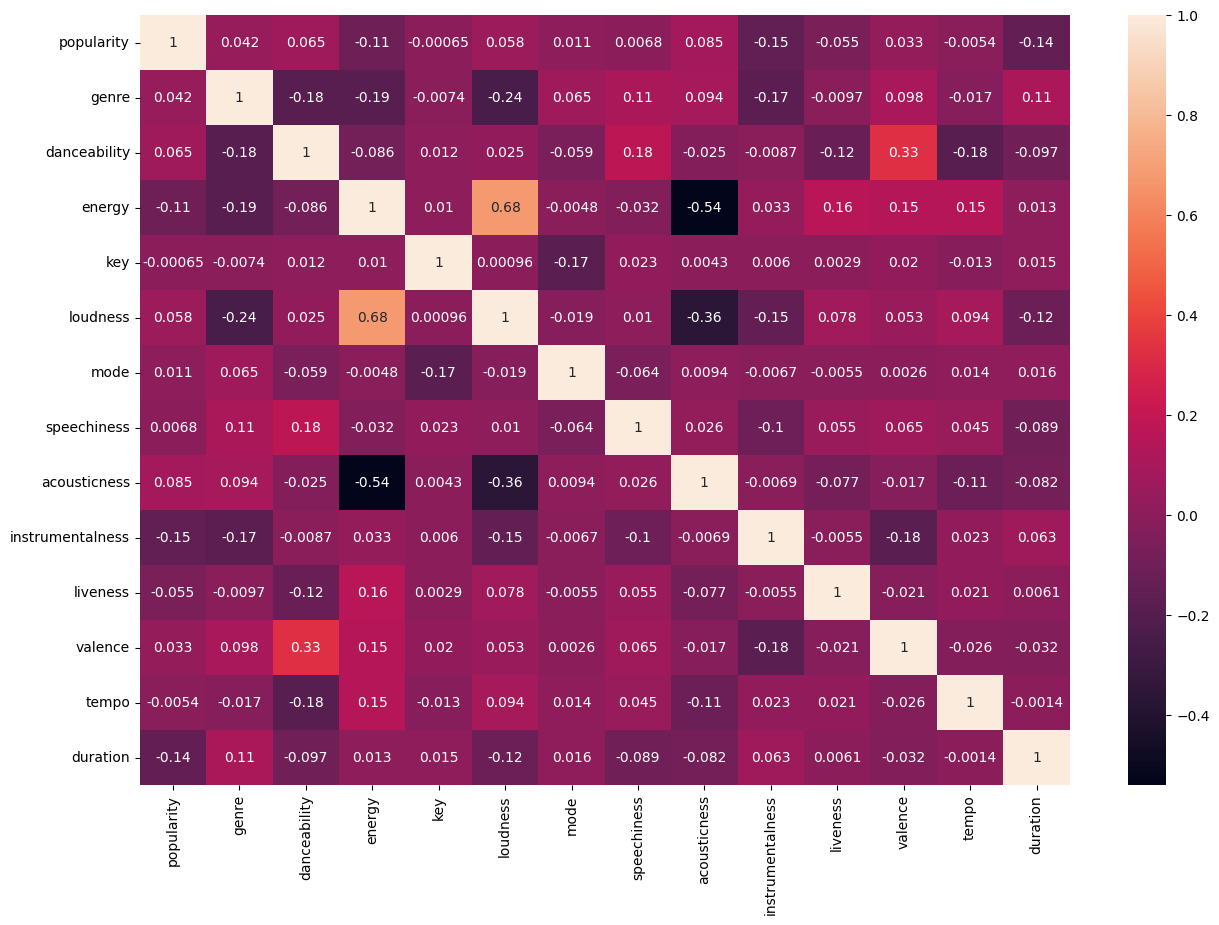

In [20]:
# korlasi antar kolom setelah normalisasi
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [21]:
# train test split
X = df.drop(columns=['genre'])
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
# Scaling data menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [24]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57      1225
           1       0.40      0.35      0.38      1066
           2       0.32      0.27      0.29      1087
           3       0.40      0.39      0.39      1071
           4       0.52      0.52      0.52      1142
           5       0.53      0.62      0.57       976

    accuracy                           0.46      6567
   macro avg       0.45      0.46      0.45      6567
weighted avg       0.45      0.46      0.45      6567



In [25]:
# Decision Tree Model
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)
dtree_pred = dtree_model.predict(X_test)

In [26]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54      1225
           1       0.36      0.38      0.37      1066
           2       0.27      0.29      0.28      1087
           3       0.37      0.36      0.36      1071
           4       0.48      0.44      0.46      1142
           5       0.59      0.58      0.58       976

    accuracy                           0.43      6567
   macro avg       0.43      0.43      0.43      6567
weighted avg       0.43      0.43      0.43      6567



In [27]:
# Random Forest Model
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_pred = rfc_model.predict(X_test)

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      1225
           1       0.52      0.43      0.47      1066
           2       0.36      0.33      0.34      1087
           3       0.47      0.46      0.47      1071
           4       0.57      0.65      0.61      1142
           5       0.66      0.74      0.70       976

    accuracy                           0.55      6567
   macro avg       0.54      0.55      0.54      6567
weighted avg       0.54      0.55      0.55      6567



In [28]:
# naive bayes model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

In [29]:
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [30]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.55      0.65      0.60      1225
           1       0.37      0.40      0.38      1066
           2       0.30      0.32      0.31      1087
           3       0.38      0.40      0.39      1071
           4       0.56      0.40      0.47      1142
           5       0.52      0.48      0.50       976

    accuracy                           0.44      6567
   macro avg       0.45      0.44      0.44      6567
weighted avg       0.45      0.44      0.44      6567



In [31]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [32]:
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [33]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.53      0.68      0.59      1225
           1       0.38      0.39      0.38      1066
           2       0.31      0.33      0.32      1087
           3       0.38      0.35      0.36      1071
           4       0.56      0.46      0.50      1142
           5       0.62      0.52      0.57       976

    accuracy                           0.46      6567
   macro avg       0.46      0.45      0.46      6567
weighted avg       0.46      0.46      0.46      6567

